In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_excel("drive/My Drive/Colab Notebooks/TCC/Taylor_Swift_Genius_Data.xlsx")
df

,Index,Album,Song Name,Lyrics
0,0,Taylor Swift,Mary's Song (Oh My My My),She said I was seven and you were nine I looke...
1,1,Taylor Swift,A Perfectly Good Heart,Why would you wanna break A perfectly good hea...
2,2,Taylor Swift,Tim McGraw,He said the way my blue eyes shined Put those ...
3,3,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,Drew looks at me I fake a smile so he won't se...
4,4,Taylor Swift,Cold As You,You have a way of coming easily to me And when...
...,...,...,...,...
190,151,Midnights,Bejeweled,Just 'cause he was high And we're dancin' all ...
191,152,Midnights,Snow On The Beach (feat. Lana Del Rey),"One night, a few moons ago I saw flecks of wha..."
192,152,Midnights,Snow On The Beach (feat. Lana Del Rey),"Weird, but fuckin' beautiful Flying in a dream..."
193,153,Midnights,Midnight Rain,"Rain He wanted it comfortable, I wanted that p..."


In [ ]:
#remover pontuação e letra maiúscula
df['clean_lyric'] = df['Lyrics'].str.lower()
df['clean_lyric'] = df['clean_lyric'].str.replace('[^\w\s]','',regex=True)

In [ ]:
#Remover stop words
#lista de stoo words em inglês
stop = ['the','or','and', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']

df['clean_lyric'] = df['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
#Lista de palavras relacionadas a estações do ano
verao = ['summer','sunshine','sun','ice cream','beach','august','june','july','hot','vacation','pool']
inverno = ['winter','snow','scarf','december','january','february','blizzard','cold','fireplace']
outono = ['autumn','orange','leaves','halloween','fall','november','october','september','yellow']
primavera = ['spring','pollen','flower','easter','april','march','may','roses']

In [ ]:
#Lista de palavras relacionadas a idade
juventude = ['young','tennage','high school','seventeen','17','eighteen','18','sixteen','16','fifteen','15','youth','adolescent','22','cheer']
velhice = ['adult','bills','mature']

In [ ]:
#Lista de palavras explicitas
explicita= ['fuck','shit','bitch','goddam','asshole']

In [ ]:
#Lista de cores
vermelho = ['red']
azul = ['blue']
preto = ['black']
branco = ['white']
verde = ['green']
cinza = ['gray']
dourado = ['gold']

In [ ]:
from xlrd.formula import dump_formula

verao='|'.join(verao)
inverno='|'.join(inverno)
outono='|'.join(outono)
primavera='|'.join(primavera)
juventude='|'.join(juventude)
velhice='|'.join(velhice)
explicita='|'.join(explicita)
vermelho='|'.join(vermelho)
azul='|'.join(azul)
preto='|'.join(preto)
branco='|'.join(branco)
verde='|'.join(verde)
cinza='|'.join(cinza)
dourado='|'.join(dourado)


df['verao'] = df['clean_lyric'].str.count(verao)
df['inverno'] = df['clean_lyric'].str.count(inverno)
df['outono'] = df['clean_lyric'].str.count(outono)
df['primavera'] = df['clean_lyric'].str.count(primavera)
df['juventude'] = df['clean_lyric'].str.count(juventude)
df['velhice'] = df['clean_lyric'].str.count(velhice)
df['explicita'] = df['clean_lyric'].str.count(explicita)
df['vermelho'] = df['clean_lyric'].str.count(vermelho)
df['azul'] = df['clean_lyric'].str.count(azul)
df['preto'] = df['clean_lyric'].str.count(preto)
df['branco'] = df['clean_lyric'].str.count(branco)
df['verde'] = df['clean_lyric'].str.count(verde)
df['cinza'] = df['clean_lyric'].str.count(cinza)
df['dourado'] = df['clean_lyric'].str.count(dourado)



In [ ]:
df

,Index,Album,Song Name,Lyrics,clean_lyric,noite,dia,verao,inverno,outono,...,vermelho,azul,preto,branco,verde,roxo,rosa,cinza,laranja,dourado
0,0,Taylor Swift,Mary's Song (Oh My My My),She said I was seven and you were nine I looke...,she said i seven you nine i looked at you like...,1,4,0,0,2,...,1,0,0,0,0,0,0,0,0,0
1,1,Taylor Swift,A Perfectly Good Heart,Why would you wanna break A perfectly good hea...,why would you wanna break perfectly good heart...,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Taylor Swift,Tim McGraw,He said the way my blue eyes shined Put those ...,he said way my blue eyes shined put those geor...,5,3,3,0,1,...,0,5,3,0,0,0,0,0,0,0
3,3,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,Drew looks at me I fake a smile so he won't se...,drew looks at me i fake smile so he wont see i...,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Taylor Swift,Cold As You,You have a way of coming easily to me And when...,you have way of coming easily me when you take...,0,3,0,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,151,Midnights,Bejeweled,Just 'cause he was high And we're dancin' all ...,just cause he high dancin all night you can tr...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,152,Midnights,Snow On The Beach (feat. Lana Del Rey),"One night, a few moons ago I saw flecks of wha...",one night few moons ago i saw flecks of what c...,3,2,10,12,1,...,0,0,0,0,1,0,0,0,0,0
192,152,Midnights,Snow On The Beach (feat. Lana Del Rey),"Weird, but fuckin' beautiful Flying in a dream...",weird but fuckin beautiful flying in dream fly...,1,0,6,7,0,...,0,0,0,0,0,0,0,0,0,0
193,153,Midnights,Midnight Rain,"Rain He wanted it comfortable, I wanted that p...",rain he wanted it comfortable i wanted pain he...,9,4,2,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_estacoes_unpivot = pd.melt(df, id_vars="Album",value_vars=['verao','inverno','outono','primavera'])

In [ ]:
df_estacoes_unpivot = df_estacoes_unpivot.groupby(by=['Album','variable'],sort=None,as_index=False).sum()

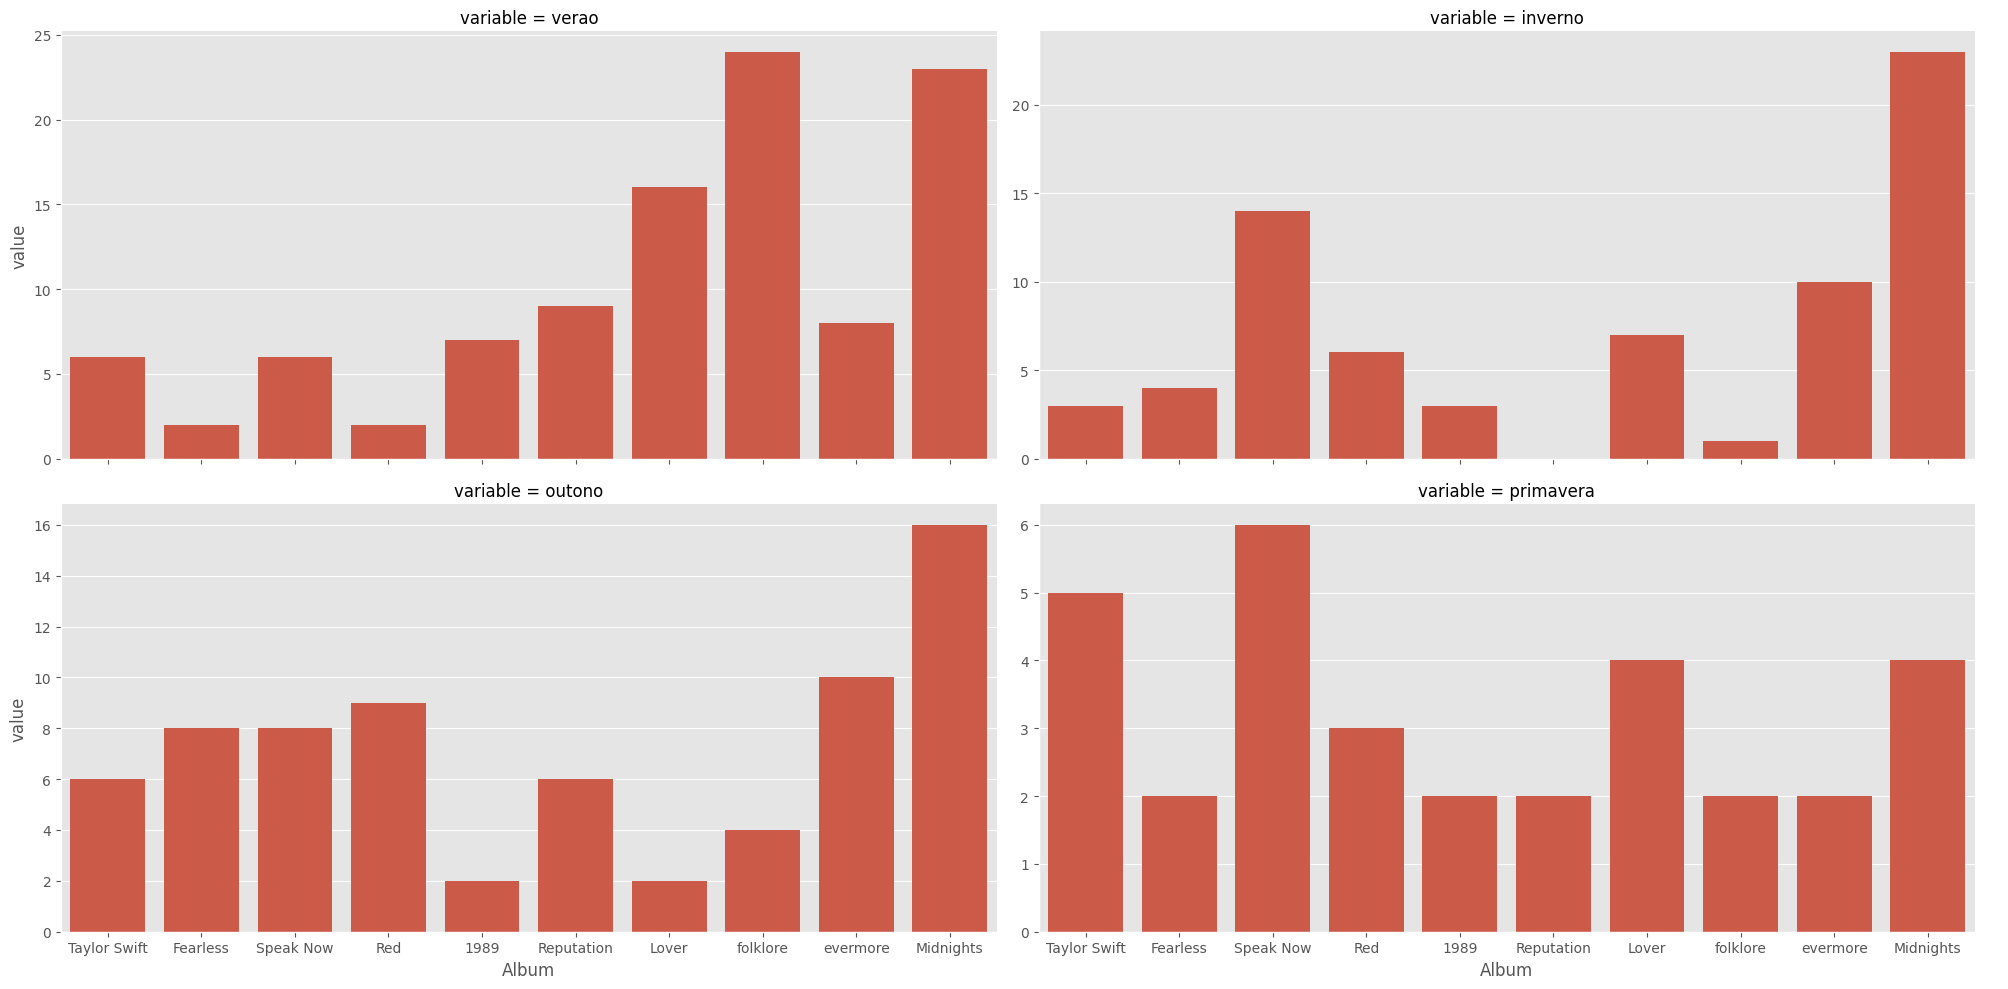

In [ ]:
sns.catplot(
    data=df_estacoes_unpivot, x='Album', y='value',
    col='variable', kind='bar', col_wrap=2,aspect=2, sharey=False
)

In [ ]:
df_idade_unpivot = pd.melt(df, id_vars="Album",value_vars=['juventude','velhice'])

In [ ]:
df_idade_unpivot = df_idade_unpivot.groupby(by=['Album','variable'],sort=None,as_index=False).sum()

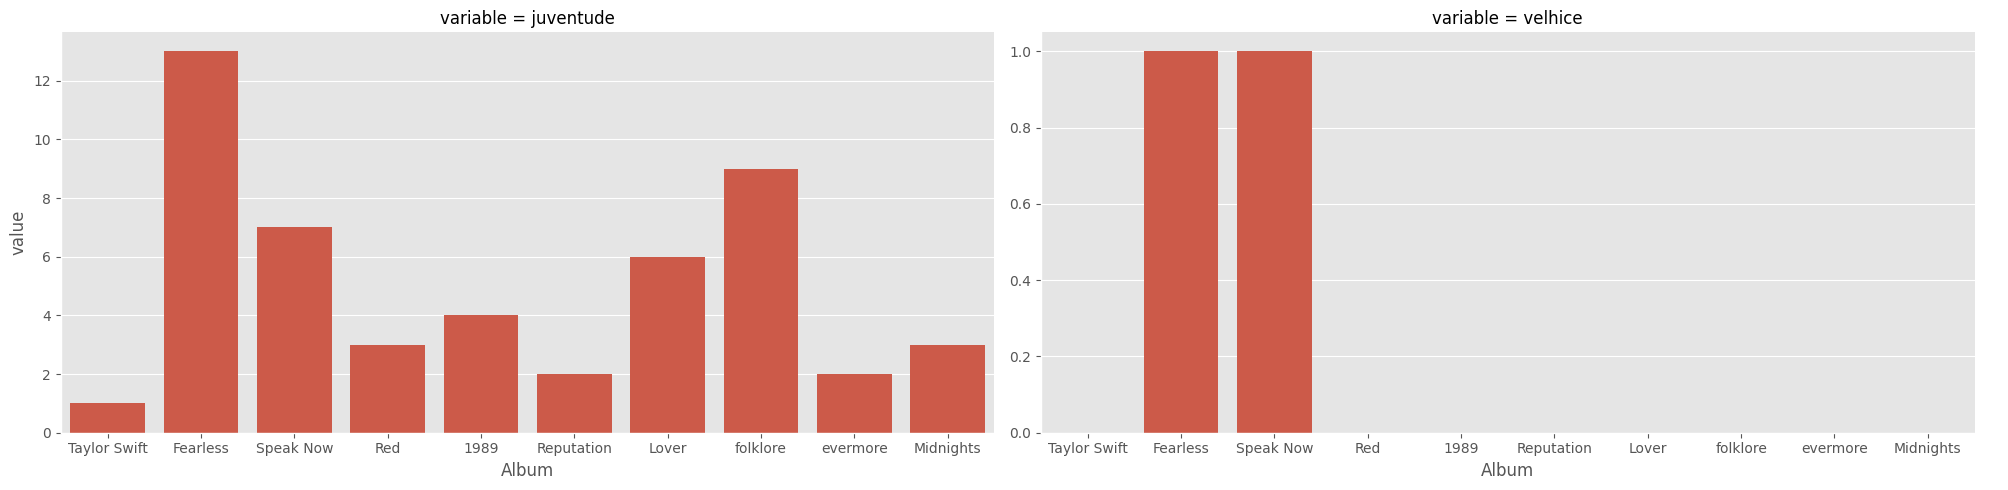

In [ ]:
sns.catplot(
    data=df_idade_unpivot, x='Album', y='value',
    col='variable', kind='bar', col_wrap=2,aspect=2, sharey=False
)

<ipython-input-66-c0ad71ba31b1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=df,x="Album",y="explicita",estimator=sum,ci=None)


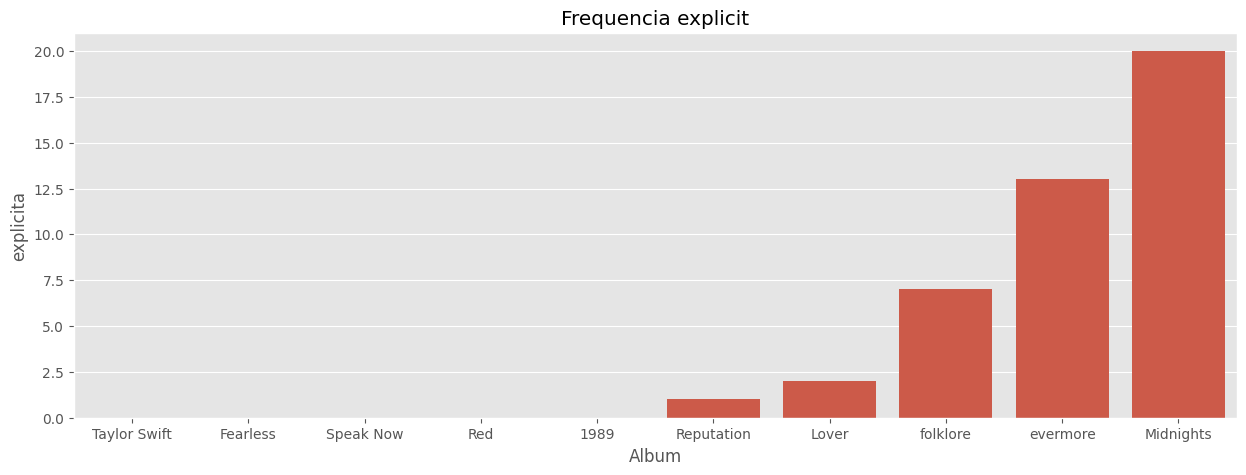

In [ ]:
plt.figure(figsize=(15,5))
grafico = sns.barplot(data=df,x="Album",y="explicita",estimator=sum,ci=None)
grafico.set_title("Frequencia explicit")
plt.show()

In [ ]:
df_cores_unpivot = pd.melt(df, id_vars="Album",value_vars=['vermelho','azul','preto','branco', 'verde','cinza','dourado'])

In [ ]:
df_cores_unpivot = df_cores_unpivot.groupby(by=['Album','variable'],sort=None,as_index=False).sum()

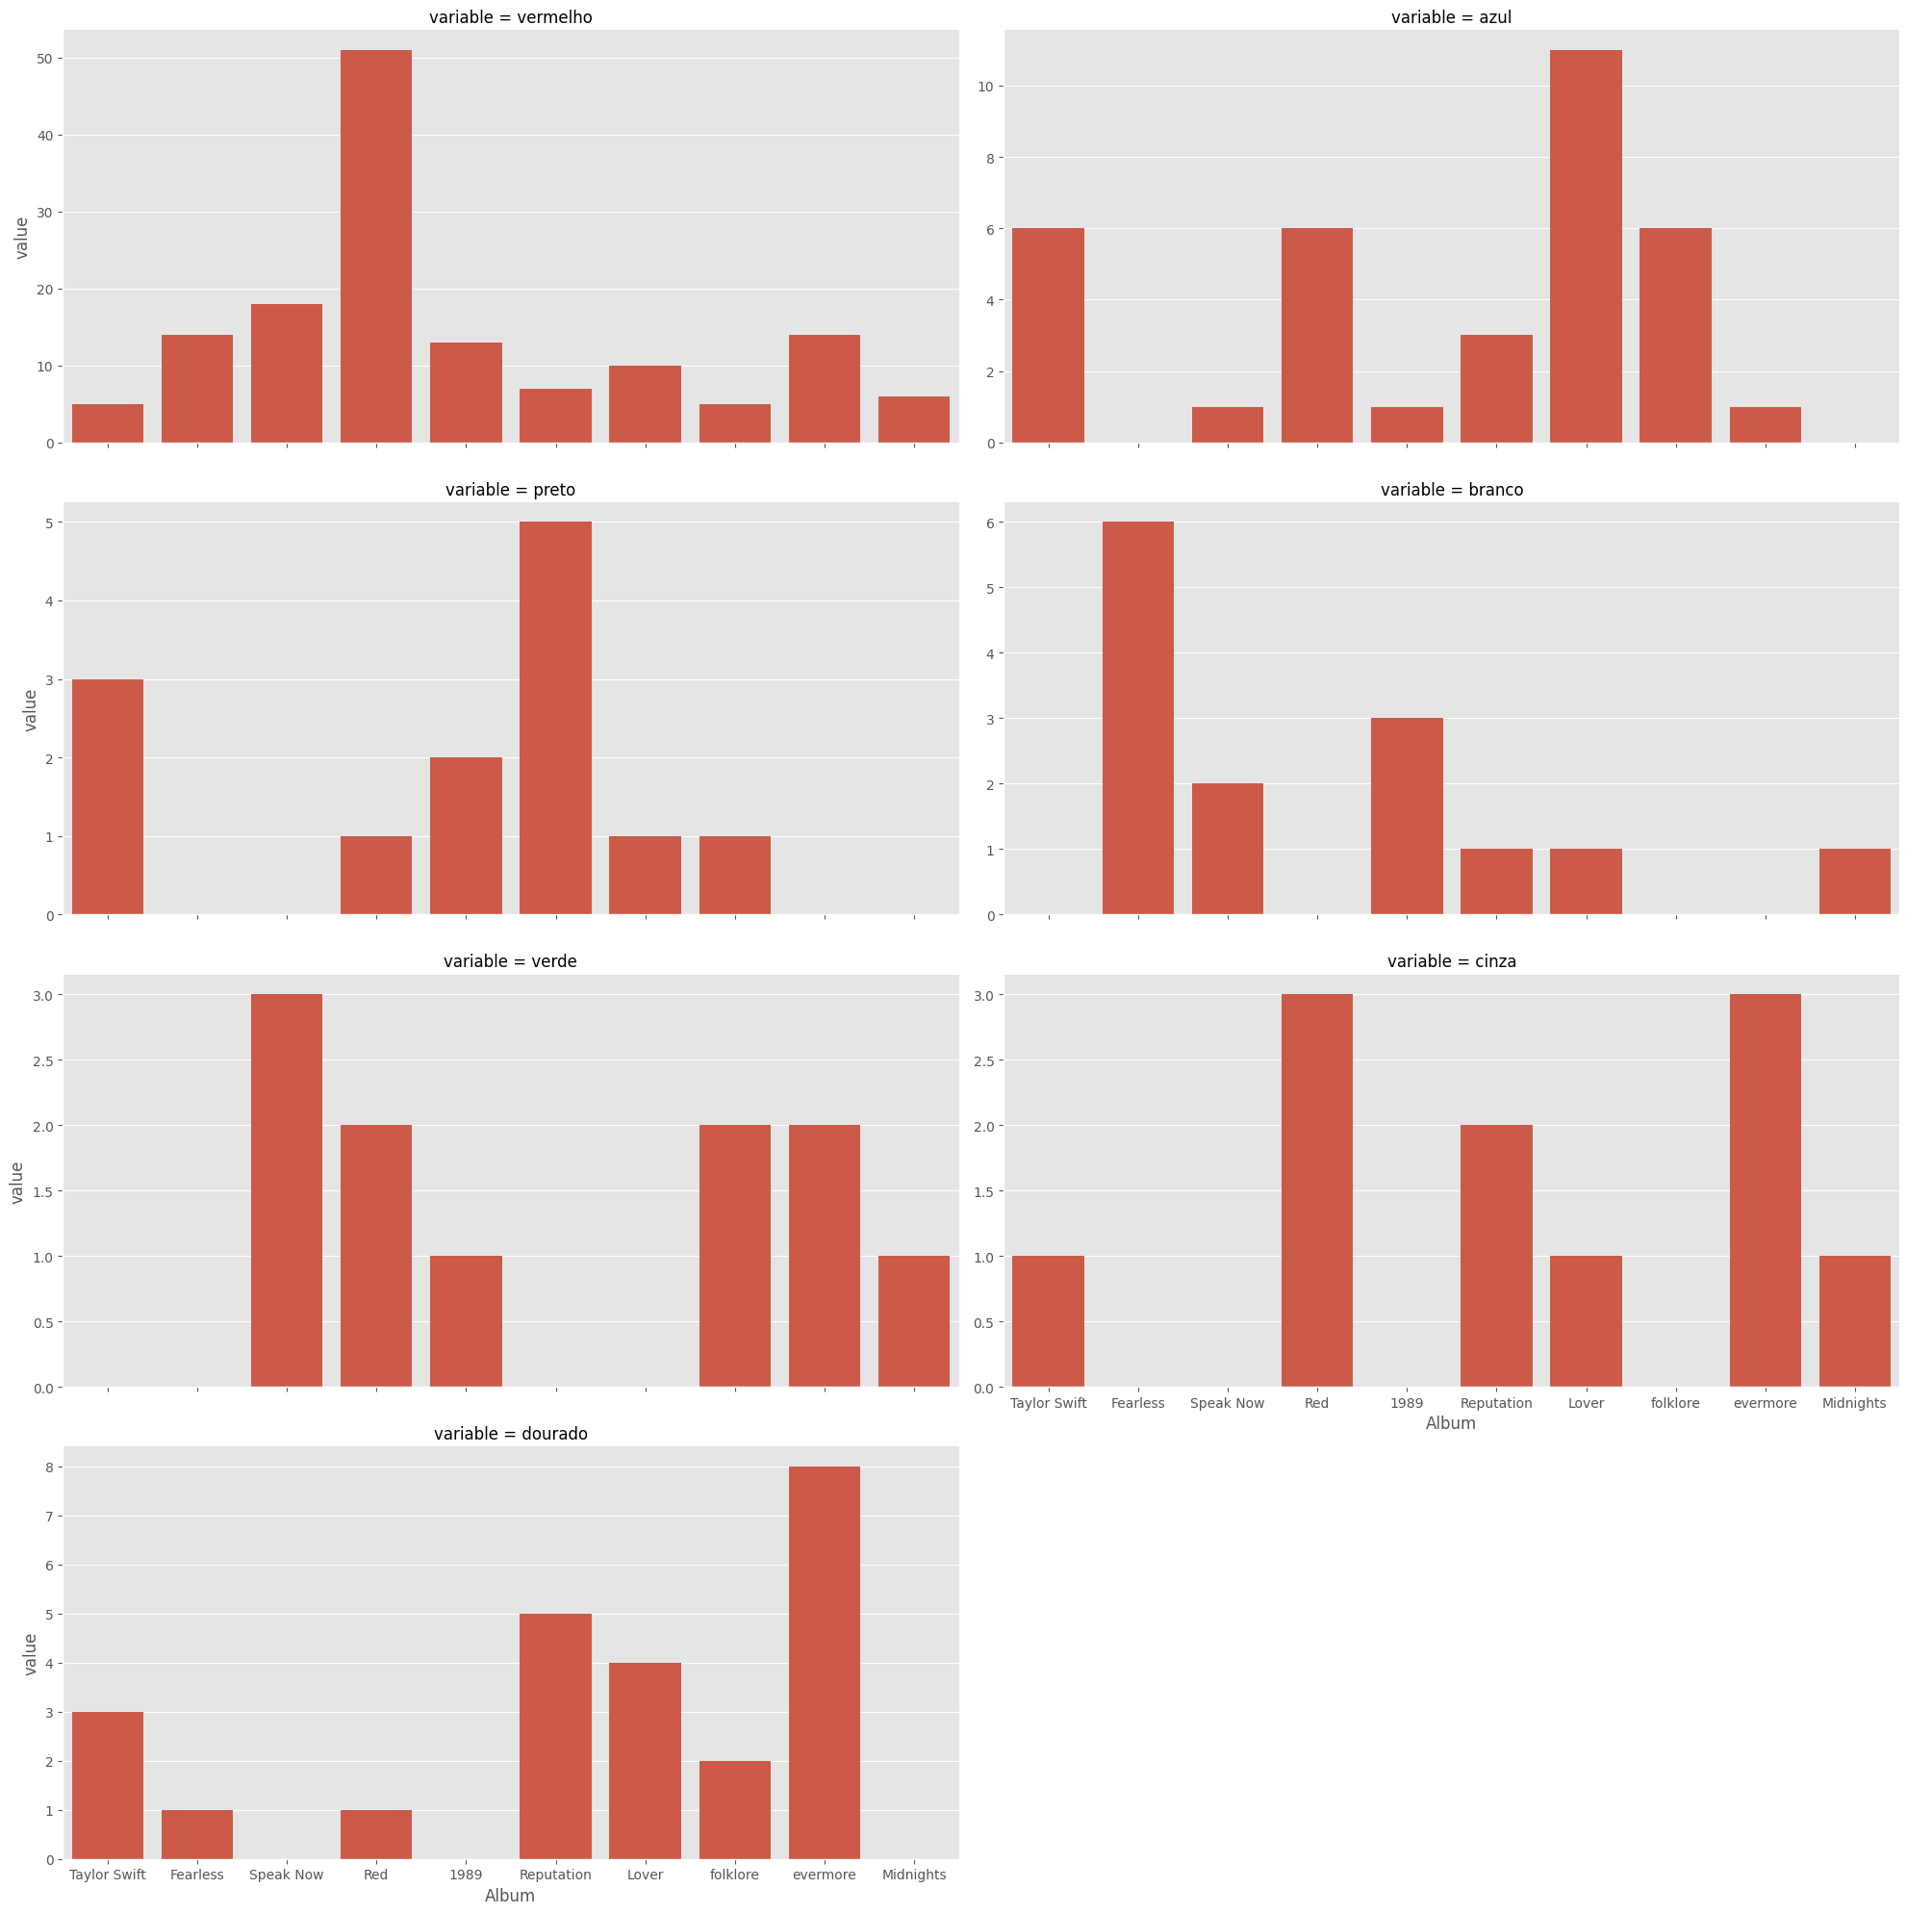

In [ ]:
sns.catplot(
    data=df_cores_unpivot, x='Album', y='value',
    col='variable', kind='bar', col_wrap=2,aspect=2, sharey=False
)

Lexical reachness

In [ ]:
def get_features(data):
    df['clean_lyric'] = df['clean_lyric'].apply(lambda x:str(x))
    df['total_length'] = df['clean_lyric'].apply(len)
    df['num_words'] = df['clean_lyric'].str.count('\S+')
    df['num_unique_words'] = df['clean_lyric'].apply(lambda comment: len(set(w for w in comment.split())))
    return data

In [ ]:
df_lex = get_features(df)

In [ ]:
df_lex=df_lex.groupby(by=['Album','Song Name'],sort=None,as_index=False).sum()
df_lex=df_lex[['Album','Song Name','total_length','num_words','num_unique_words']]

<ipython-input-95-ba1afdda336a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_lex=df_lex.groupby(by=['Album','Song Name'],sort=None,as_index=False).sum()


In [ ]:
df_lex['Riqueza lexical'] = df_lex['num_unique_words'] / df_lex['num_words']

In [ ]:
df_lex

,Album,Song Name,total_length,num_words,num_unique_words,Riqueza lexical
0,Taylor Swift,Mary's Song (Oh My My My),1319,276,136,0.492754
1,Taylor Swift,A Perfectly Good Heart,1084,208,65,0.312500
2,Taylor Swift,Tim McGraw,1562,312,117,0.375000
3,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,1188,249,128,0.514056
4,Taylor Swift,Cold As You,1049,205,99,0.482927
...,...,...,...,...,...,...
142,Midnights,Question...?,1916,379,197,0.519789
143,Midnights,Bejeweled,1877,378,181,0.478836
144,Midnights,Snow On The Beach (feat. Lana Del Rey),1811,354,142,0.401130
145,Midnights,Midnight Rain,1288,243,96,0.395062


<ipython-input-98-fb5e5f8aa739>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=df_lex,x="Album",y="Riqueza lexical",estimator='mean',ci=None,label=True)


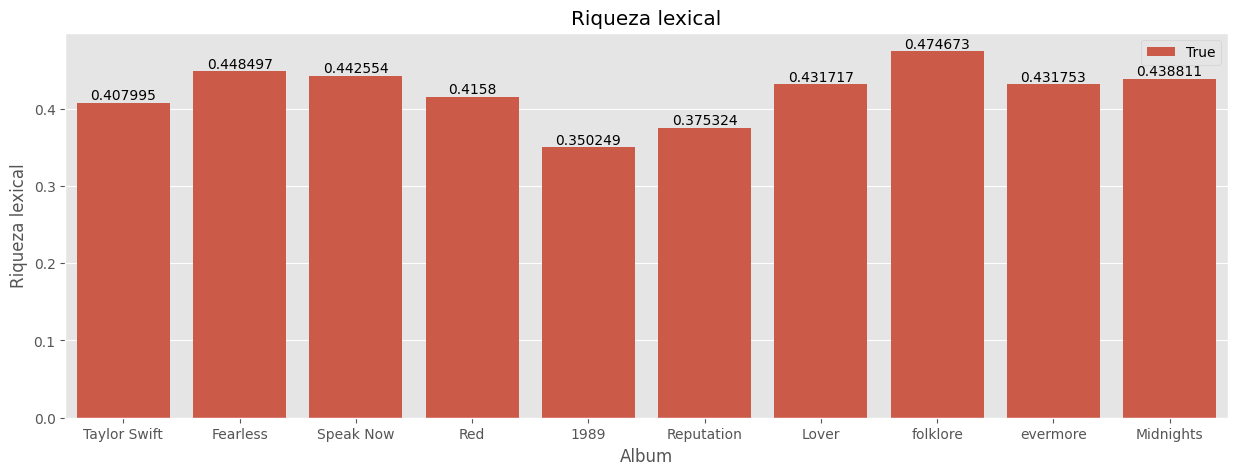

In [ ]:
plt.figure(figsize=(15,5))
grafico = sns.barplot(data=df_lex,x="Album",y="Riqueza lexical",estimator='mean',ci=None,label=True)
grafico.set_title("Riqueza lexical")
grafico.bar_label(grafico.containers[0])
plt.show()

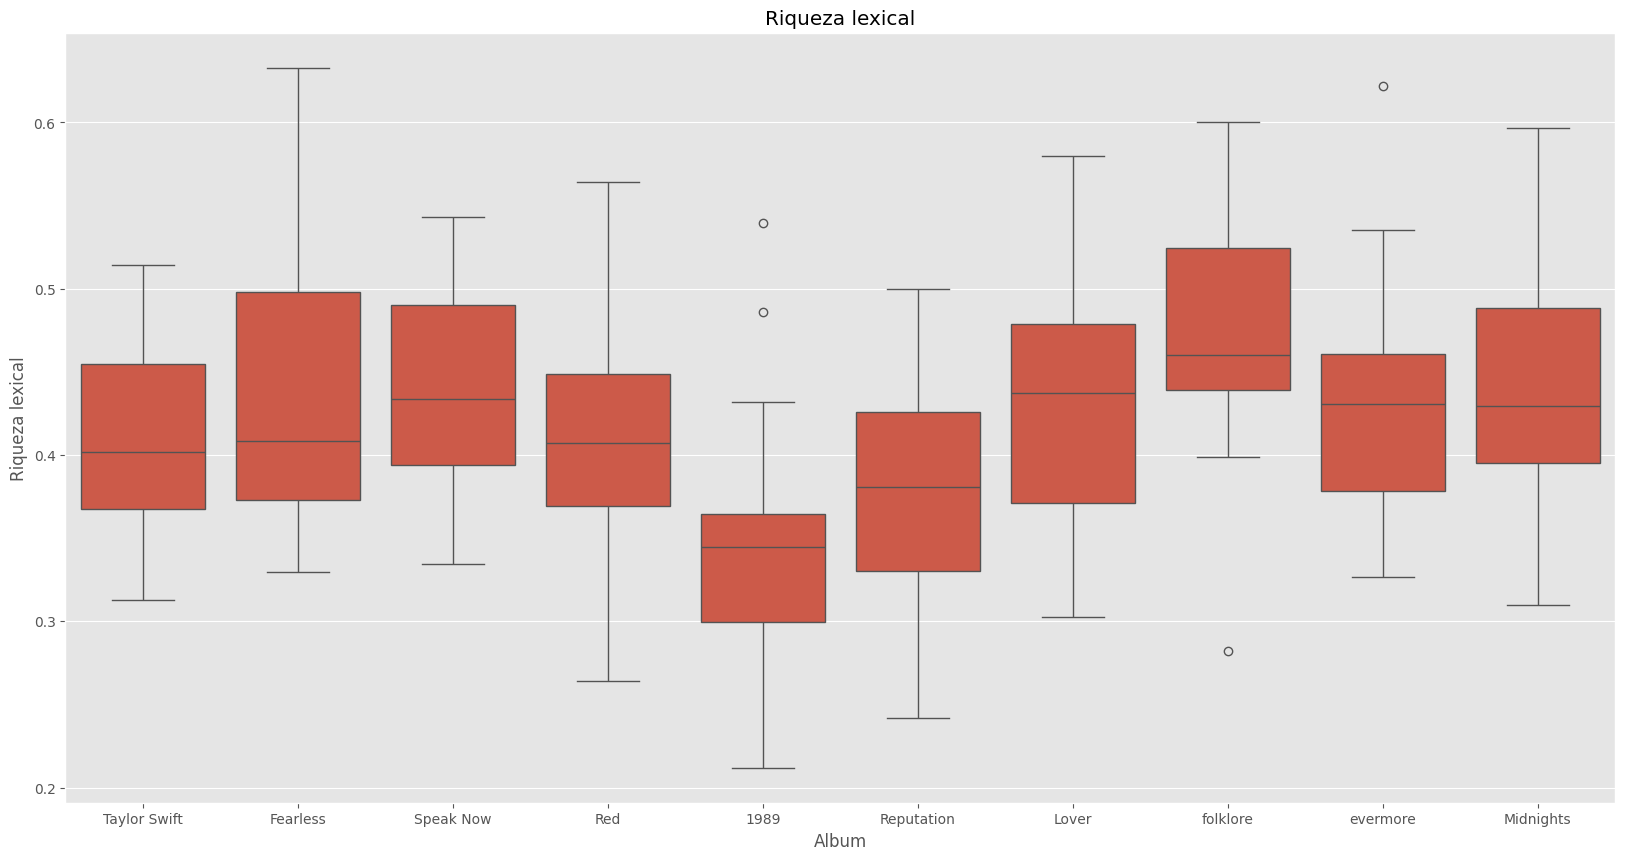

In [ ]:
plt.figure(figsize=(20,10))
grafico = sns.boxplot( x=df_lex["Album"], y=df_lex["Riqueza lexical"])
grafico.set_title("Riqueza lexical")
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

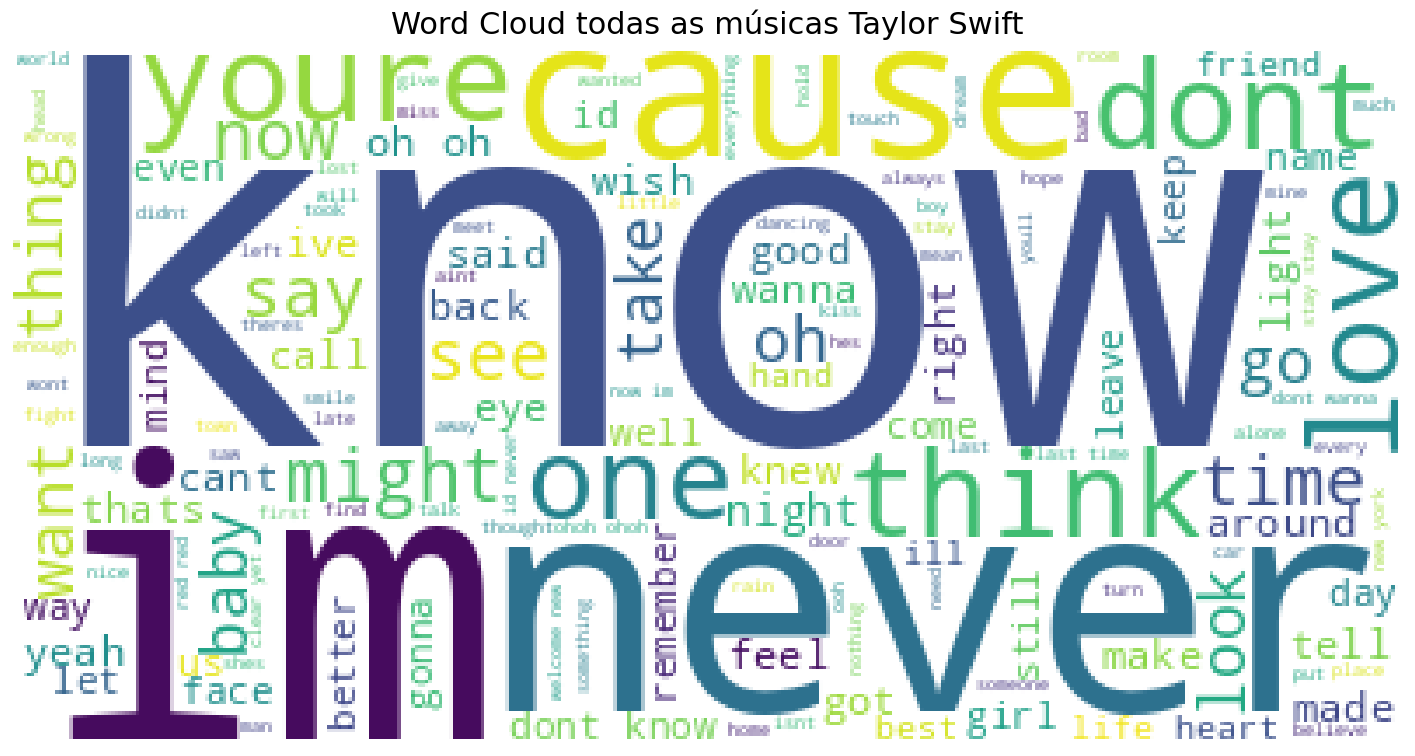

In [ ]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(' '.join(text for text in df['clean_lyric']))
plt.figure(figsize=(18,10))
plt.title('Word Cloud todas as músicas Taylor Swift',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()